# Chapter 4 Simple Regression

- run-model4-4.py


In [1]:
# linear regression: 'x에는 노이즈가 없으나 y에는 노이즈가 있다는 전제; (x, y(=noise x))'
# mu1(정규분포 평균값) = a + b*x1, y1 = mu1 + epsilon1(정규분포, N(0, sigma1))
# modeling -> inverse computation

import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz
import cmdstanpy

/home/atruergod/Python/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os, sys

os.chdir('../../chap04')
print("Current working directory:", os.getcwd())

Current working directory: /home/atruergod/git/Matsuura2022_Bayesian_Statistical_Modeling_with_Stan_R_and_Python/chap04


### Just Run `run-model4-4.py`

In [3]:
from pathlib import Path
stan_file = Path('model', 'model4-4.stan')
stan_code = stan_file.read_text()
print(stan_code)

data {
  int N;
  vector[N] X;
  vector[N] Y;
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  Y[1:N] ~ normal(a + b*X[1:N], sigma);
}



15:02:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:02:37 - cmdstanpy - INFO - CmdStan done processing.


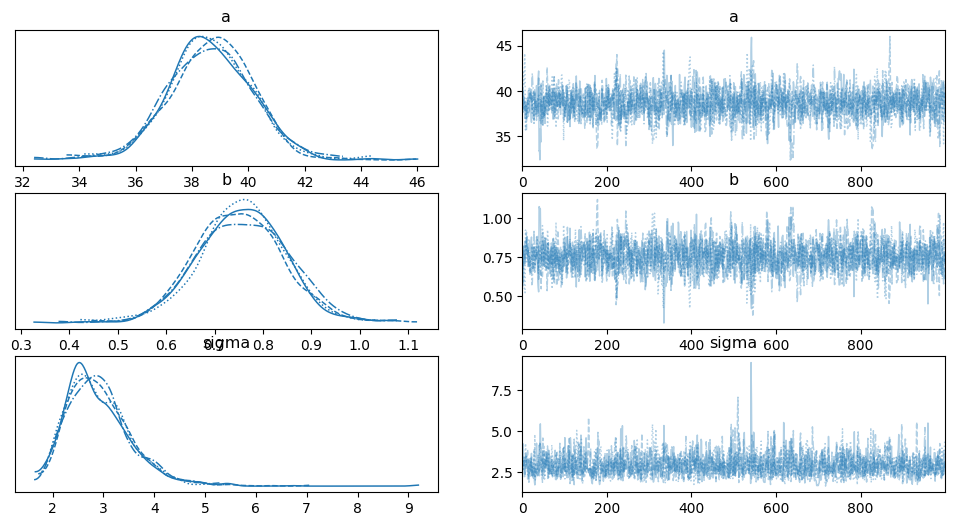

In [4]:
d = pandas.read_csv('input/data-salary.csv')
data = d.to_dict('list')
data.update({'N':len(d)})
model = cmdstanpy.CmdStanModel(stan_file='model/model4-4.stan')
fit = model.sample(data=data, seed=123)

fit.save_csvfiles('output/result-model4-4')
fit.summary().to_csv('output/fit-summary.csv')

axes = arviz.plot_trace(fit)
fig = axes.ravel()[0].figure
fig.savefig('output/fit-plot.pdf')

### Step-by-Step 

In [5]:
d = pandas.read_csv('input/data-salary.csv')
d.describe()

,X,Y
count,15.000000,15.000000
mean,13.933333,49.180000
std,8.455486,6.842117
min,1.000000,38.000000
25%,6.000000,45.300000
50%,16.000000,48.400000
75%,20.000000,52.650000
max,26.000000,61.000000


In [6]:
d.head(4)

,X,Y
0,7,45.7
1,10,48.2
2,16,51.8
3,25,53.5


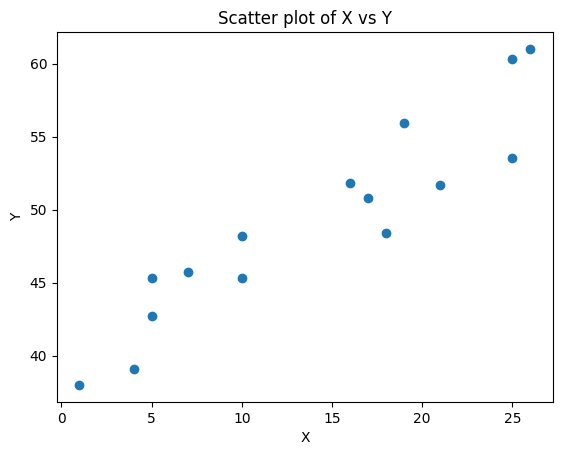

In [7]:
import matplotlib.pyplot as plt

plt.scatter(d.X, d.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

In [8]:
data = d.to_dict('list') # Convert DataFrame to dictionary format 
data.update({'N':len(d)})
data 

{'X': [7, 10, 16, 25, 5, 25, 26, 18, 17, 1, 5, 4, 19, 10, 21],
 'Y': [45.7,
  48.2,
  51.8,
  53.5,
  42.7,
  60.3,
  61.0,
  48.4,
  50.8,
  38.0,
  45.3,
  39.1,
  55.9,
  45.3,
  51.7],
 'N': 15}

In [9]:
with open('model/model4-4.stan', 'r') as f:
    stan_code = f.read()
print("// Stan Model code for model4-4")
print(stan_code)

// Stan Model code for model4-4
data {
  int N;
  vector[N] X;
  vector[N] Y;
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  Y[1:N] ~ normal(a + b*X[1:N], sigma);
}



In [10]:
# Run the model with the data
model = cmdstanpy.CmdStanModel(stan_file='model/model4-4.stan')

# Sample from the model through HMC-NUTS
fit = model.sample(data=data, seed=123)

15:02:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 4 |          | 00:00 Status

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:02:41 - cmdstanpy - INFO - CmdStan done processing.


In [11]:
samples_df = fit.draws_pd()
samples_df.describe()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,a,b,sigma
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.500000,500.500000,2000.500000,-21.600669,0.927766,0.317607,2.837000,9.334500,0.0,23.110118,38.655091,0.755904,2.913153
std,1.118174,288.711081,1154.844867,1.323797,0.109313,0.022494,0.759655,4.602217,0.0,1.786482,1.505807,0.092535,0.636986
min,1.000000,1.000000,1.000000,-32.361242,0.032690,0.287780,1.000000,1.000000,0.0,20.015146,32.381047,0.326436,1.633805
25%,1.750000,250.750000,1000.750000,-22.202262,0.909540,0.305962,2.000000,7.000000,0.0,21.817711,37.709578,0.695872,2.457778
50%,2.500000,500.500000,2000.500000,-21.289130,0.970870,0.315956,3.000000,7.000000,0.0,22.798079,38.654588,0.756242,2.818168
75%,3.250000,750.250000,3000.250000,-20.628040,0.993096,0.327600,3.000000,15.000000,0.0,24.016584,39.624621,0.816424,3.259171
max,4.000000,1000.000000,4000.000000,-19.941102,1.000000,0.350734,4.000000,31.000000,0.0,33.402940,46.049158,1.121902,9.203705


In [12]:
draws = samples_df[['a', 'b', 'sigma']]
draws.head(4)

,a,b,sigma
0,39.784597,0.765017,2.982314
1,40.502152,0.583673,4.240166
2,40.146106,0.609158,4.217188
3,40.082662,0.586905,3.742777


In [15]:
!pip install plotly
import plotly.graph_objs as go
import plotly.offline as pyoff

trace = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=draws['sigma'],
    mode='markers',
    marker=dict(
        size=3,
        color=draws['sigma'],
        colorscale='Viridis',
        opacity=0.7
    )
)

layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='b',
        zaxis_title='sigma'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    height=700,
    width=1000,
)

proj_ab = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=[0] * len(draws),
    mode='markers',
    marker=dict(
        size=2,
        color='rgba(5,5,255,0.5)',
        opacity=0.3
    ),
    showlegend=False
)

layout.height = 700

fig = go.Figure(data=[trace, proj_ab], layout=layout)
pyoff.iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

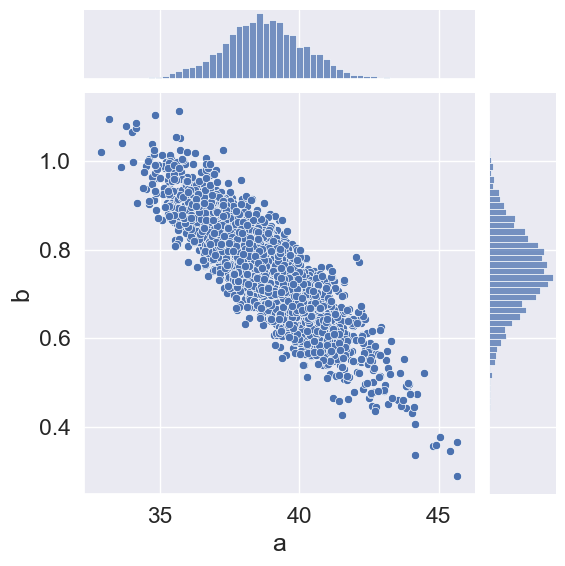

In [ ]:
sns.set(font_scale=1.5)
p = sns.jointplot(data=draws, x='a', y='b')

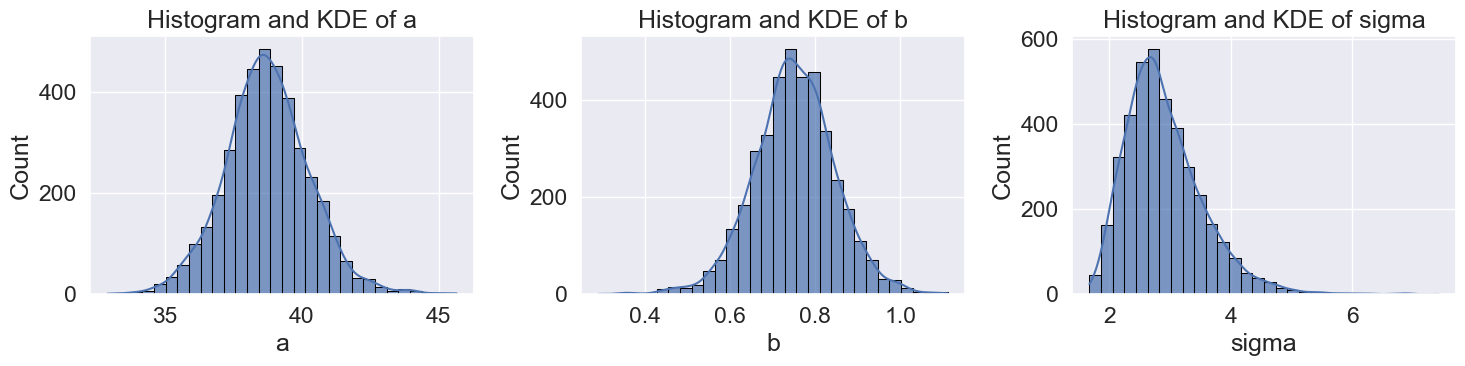

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(draws['a'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('a')
plt.title('Histogram and KDE of a')

plt.subplot(1, 3, 2)
sns.histplot(draws['b'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('b')
plt.title('Histogram and KDE of b')

plt.subplot(1, 3, 3)
sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.title('Histogram and KDE of sigma')

plt.tight_layout()
plt.show()

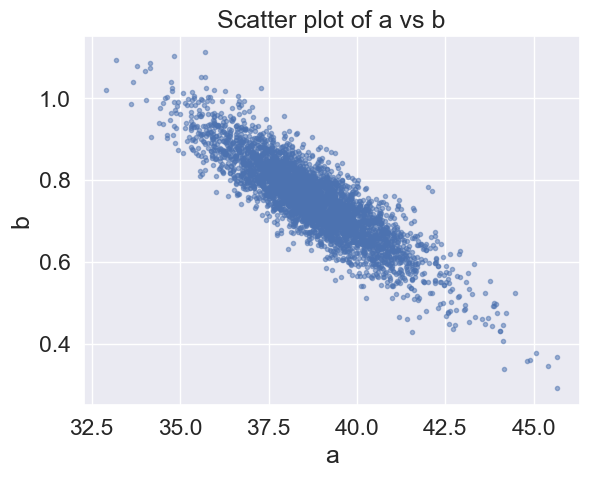

In [ ]:
plt.scatter(draws['a'], draws['b'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a vs b')
plt.show()

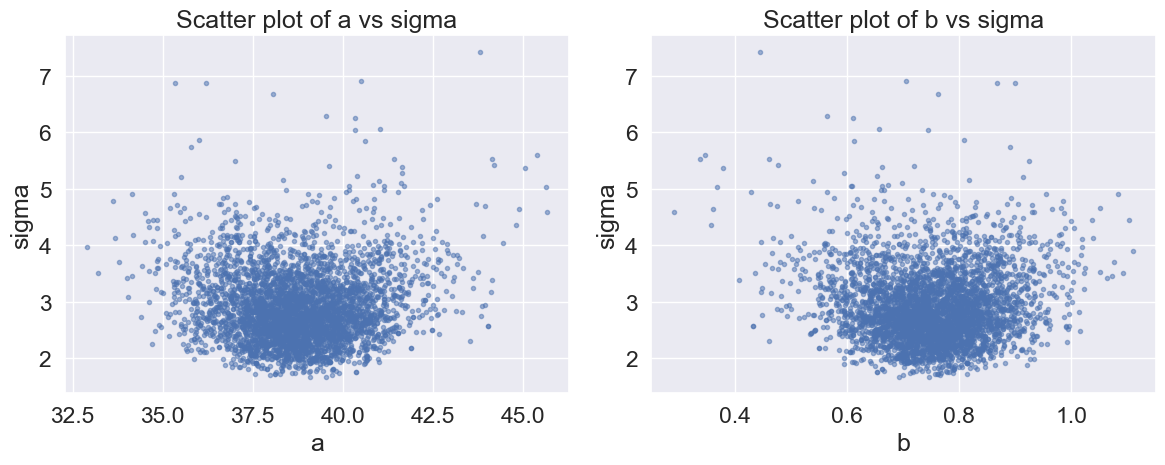

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(draws['a'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('sigma')
plt.title('Scatter plot of a vs sigma')

plt.subplot(1, 2, 2)
plt.scatter(draws['b'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('b')
plt.ylabel('sigma')
plt.title('Scatter plot of b vs sigma')

plt.tight_layout()
plt.show()

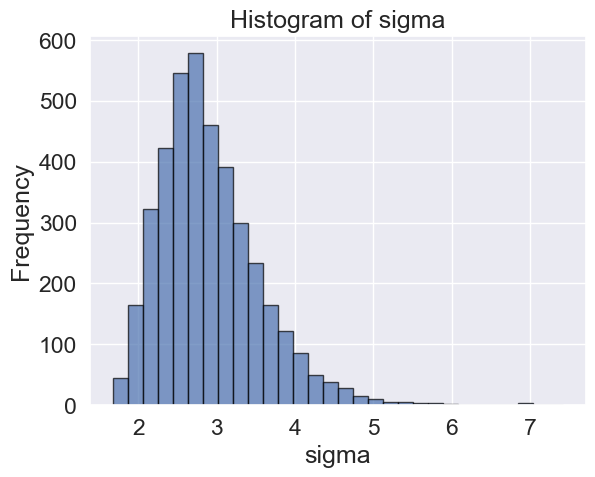

In [ ]:
plt.hist(draws['sigma'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram of sigma')
plt.show()

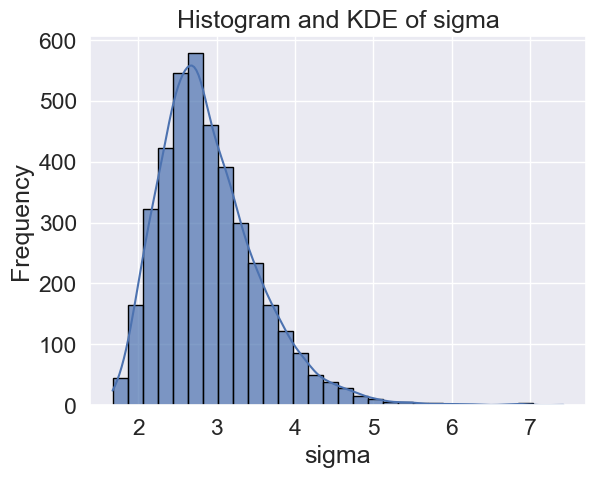

In [ ]:
import seaborn as sns

sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram and KDE of sigma')
plt.show()

In [ ]:
draws_df = draws.copy()

# compute the mean and standard deviation of 'a', 'b', and 'sigma'
means = draws_df.mean(axis=0)
stds = draws_df.std(axis=0)
print(means['a'], means['b'], means['sigma'], stds['a'], stds['b'], stds['sigma'])
print(means.a, means.b, means.sigma, stds.a, stds.b, stds.sigma)

38.750405375 0.7508575102499999 2.9055065625 1.5545711406997376 0.09596900439005711 0.6479181124417391
38.750405375 0.7508575102499999 2.9055065625 1.5545711406997376 0.09596900439005711 0.6479181124417391


1 26


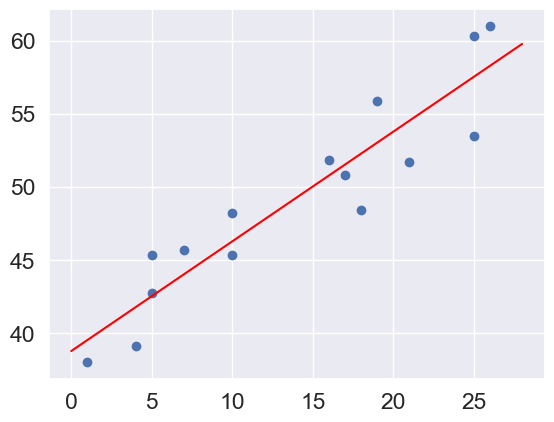

In [ ]:
print(d.X.min(), d.X.max())
Xp = np.linspace(d.X.min()-1, d.X.max()+2, 100)

ymean = means['a'] + means['b'] * Xp
plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')

1 26


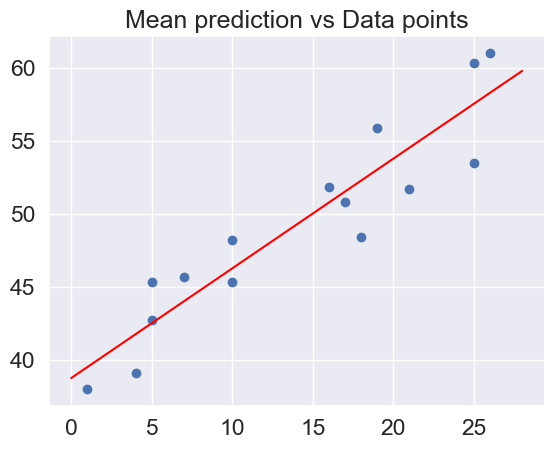

In [ ]:
import numpy as np
print(d.X.min(), d.X.max())
Xp = np.linspace(d.X.min()-1, d.X.max()+2, 100)

ymean = means['a'] + means['b'] * Xp

plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')
plt.title('Mean prediction vs Data points')
plt.show()

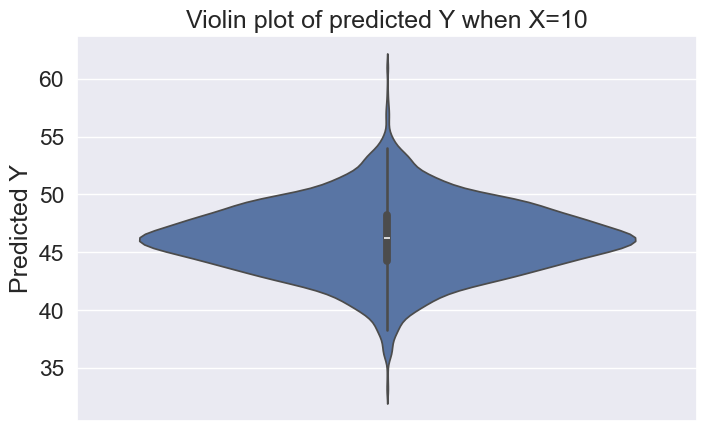

In [ ]:
import seaborn as sns

# What would be the predicted value of Y when X=10?
Xpred = 10
Ybase = draws_df['a'] + draws_df['b'] * Xpred
Ypred = Ybase + np.random.normal(0, draws_df['sigma'], size=len(Ybase))

plt.figure(figsize=(8, 5))
sns.violinplot(y=Ypred, inner='box')
plt.ylabel('Predicted Y')
plt.title('Violin plot of predicted Y when X=10')
plt.show()

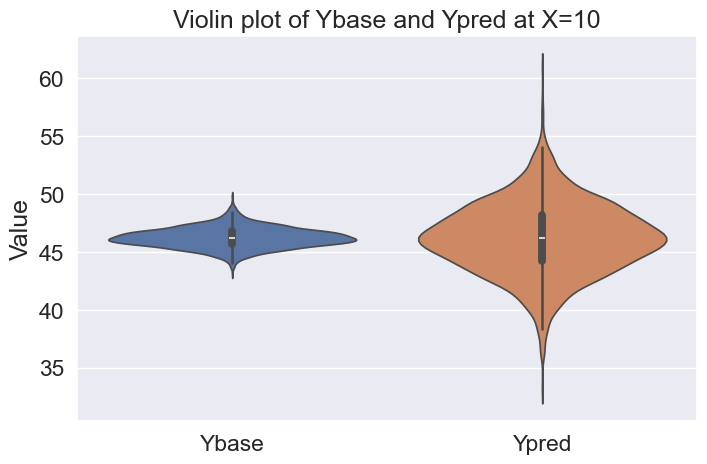

In [ ]:
import pandas as pd
import seaborn as sns

df_pred = pd.DataFrame({'Ybase': Ybase, 'Ypred': Ypred})
df_pred.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.grid(True)
sns.violinplot(data=df_pred, inner='box')
plt.ylabel('Value')
plt.title(f'Violin plot of Ybase and Ypred at X={Xpred}')
plt.show()

In [ ]:
Xp = np.arange(0, 30)
Np = len(Xp)
N_ms = len(draws_df)

Yb = np.zeros(shape=(N_ms, Np)) # without noise
Yp = np.zeros(shape=(N_ms, Np)) # with noise (sigma)
for n in range(Np):
    Yb[:,n] = draws_df.a + draws_df.b * Xp[n]
    Yp[:,n] = Yb[:,n] + np.random.normal(0, draws_df.sigma, N_ms)

# mean prediction
Ymean = draws_df.a.mean() + draws_df.b.mean() * Xp

# compute quantiles
qua = np.quantile(Yb, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', Yp.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (30,)
Shape of Yp: (4000, 30)
Shape of Qua: (5, 30)
     X       2.5%        25%        50%        75%      97.5%
0  0.0  35.695673  37.770850  38.700000  39.699550  41.907393
1  1.0  36.631793  38.563194  39.444614  40.391584  42.500377
       X       2.5%        25%        50%        75%      97.5%
28  28.0  56.628321  58.792578  59.772382  60.757060  62.787033
29  29.0  57.162172  59.494935  60.515143  61.566485  63.707122


In [ ]:
Yb_df = pandas.DataFrame(Yb, columns=Xp)
print(Yb_df.shape)
print(Yb_df.tail(2))

(4000, 30)
           0          1         2          3         4          5         6   \
3998  40.3961  41.064600  41.73310  42.401600  43.07010  43.738600  44.40710   
3999  36.9589  37.796755  38.63461  39.472465  40.31032  41.148175  41.98603   

             7         8          9   ...       20         21        22  \
3998  45.075600  45.74410  46.412600  ...  53.7661  54.434600  55.10310   
3999  42.823885  43.66174  44.499595  ...  53.7160  54.553855  55.39171   

             23        24         25        26         27        28         29  
3998  55.771600  56.44010  57.108600  57.77710  58.445600  59.11410  59.782600  
3999  56.229565  57.06742  57.905275  58.74313  59.580985  60.41884  61.256695  

[2 rows x 30 columns]


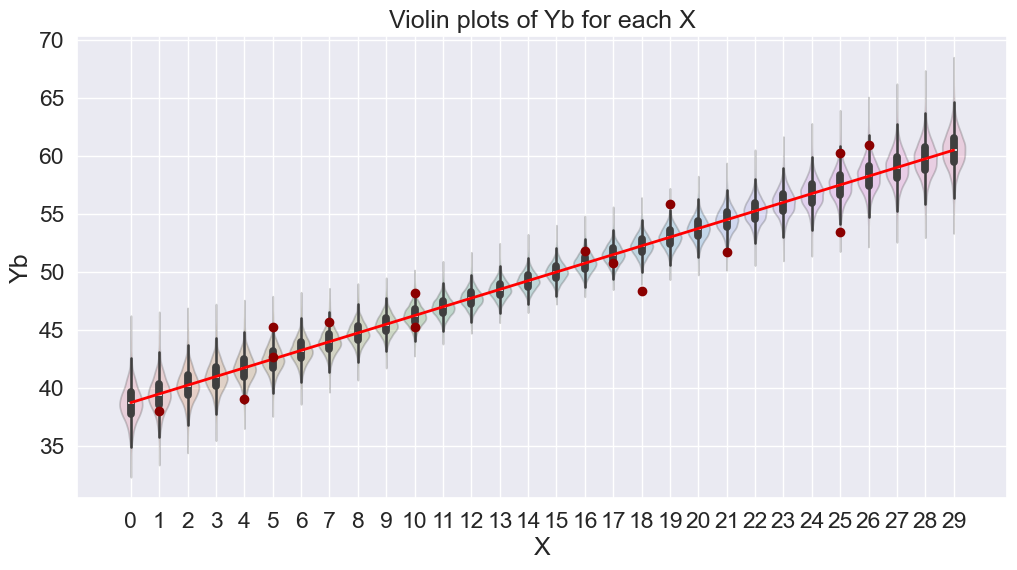

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=Yb_df, inner='box', alpha=.25)
plt.plot(Xp, Ymean, color='red', label='Base prediction', linewidth=2)
plt.scatter(d.X, d.Y, color='darkred', label='Data points', zorder=10)
plt.xlabel('X')
plt.ylabel('Yb')
plt.grid(True)
plt.title('Violin plots of Yb for each X')

plt.show()

In [ ]:
print('Density Summary: :', d_est.shape)
print(d_est.head(2))

Density Summary: : (30, 6)
     X       2.5%        25%        50%        75%      97.5%
0  0.0  35.695673  37.770850  38.700000  39.699550  41.907393
1  1.0  36.631793  38.563194  39.444614  40.391584  42.500377


### Bayesian CI for baseline annual income
- Fig. 4.8 (in page 61)
- from 0 to 28 years of work experience
- For each X, CI is computed. The plot is a connection of those CIs.
- No measurement noise first.

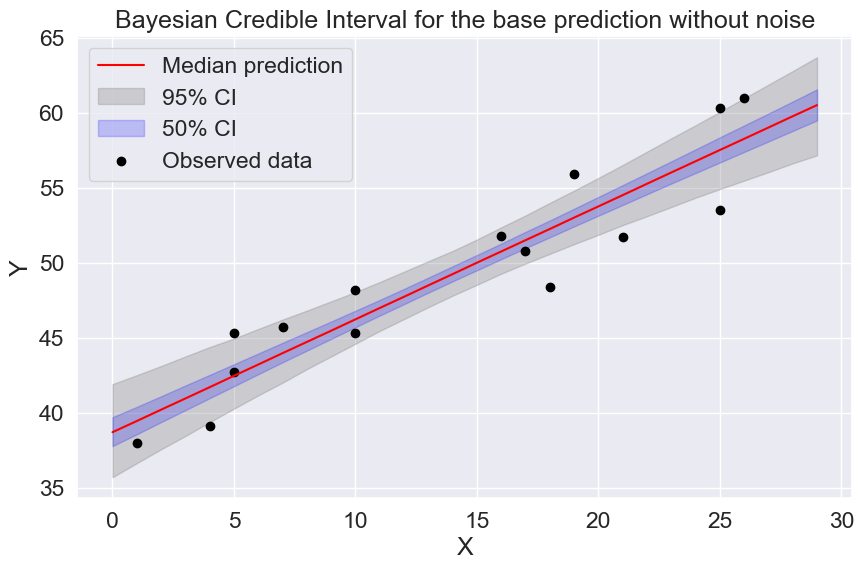

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for the base prediction without noise')
plt.legend()
plt.grid(True)
plt.show()

### Now with measurement noise
- See Fig. 4.8

In [ ]:
Yb = np.zeros(shape=(N_ms, Np)) # without noise
Yp = np.zeros(shape=(N_ms, Np)) # with noise (sigma)
for n in range(Np):
    Yb[:,n] = draws_df.a + draws_df.b * Xp[n]
    Yp[:,n] = Yb[:,n] + np.random.normal(0, draws_df.sigma, N_ms)

# compute quantiles for the predictions with measurement noise

qua = np.quantile(Yp, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', Yp.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (30,)
Shape of Yp: (4000, 30)
Shape of Qua: (5, 30)
     X       2.5%        25%        50%        75%      97.5%
0  0.0  31.954597  36.591896  38.677621  40.863984  45.664280
1  1.0  33.190748  37.478729  39.517924  41.583118  46.127669
       X       2.5%        25%        50%        75%      97.5%
28  28.0  53.347399  57.740901  59.776863  61.930862  66.284529
29  29.0  54.009825  58.351889  60.547310  62.727111  67.228680


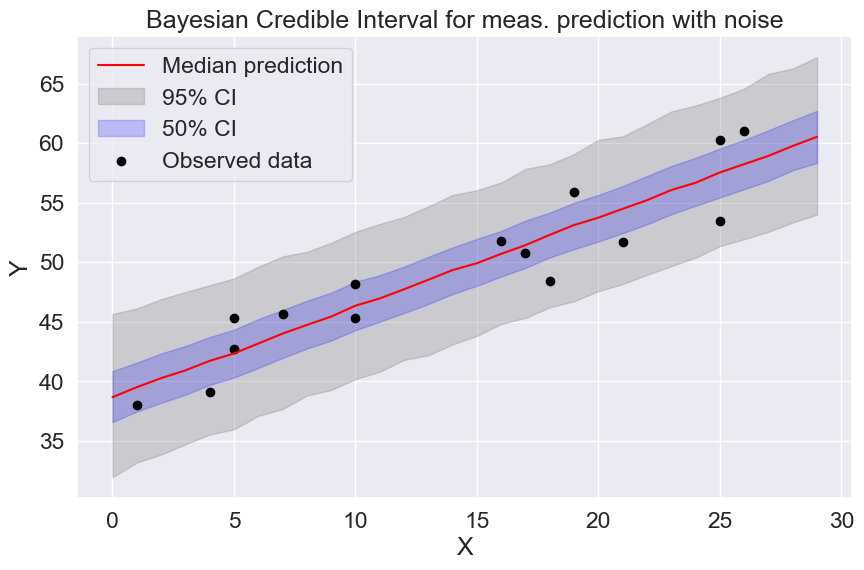

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for meas. prediction with noise')
plt.legend()
plt.grid(True)
plt.show()

## MAP Estimation (Point estimate)

In [ ]:
print(stan_code)

data {
  int N;
  vector[N] X;
  vector[N] Y;
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  Y[1:N] ~ normal(a + b*X[1:N], sigma);
}



In [ ]:
map_est = model.optimize(data=data, seed=123)
print('optimization results:')
print(map_est.a, map_est.b, map_est.sigma)

# pandas output
map_est_pd = map_est.optimized_params_pd
map_est_dict = map_est.optimized_params_dict
map_est.optimized_params_pd, map_est.optimized_params_dict, map_est.optimized_params_np

10:10:02 - cmdstanpy - INFO - Chain [1] start processing
10:10:02 - cmdstanpy - INFO - Chain [1] done processing
10:10:02 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
10:10:02 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
10:10:02 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.


optimization results:
38.6969 0.752377 2.43318


(      lp__        a         b    sigma
 0 -20.8378  38.6969  0.752377  2.43318,
 OrderedDict([('lp__', -20.8378),
              ('a', 38.6969),
              ('b', 0.752377),
              ('sigma', 2.43318)]),
 array([-20.8378  ,  38.6969  ,   0.752377,   2.43318 ]))

In [ ]:
map_est_dict['a']

38.6969

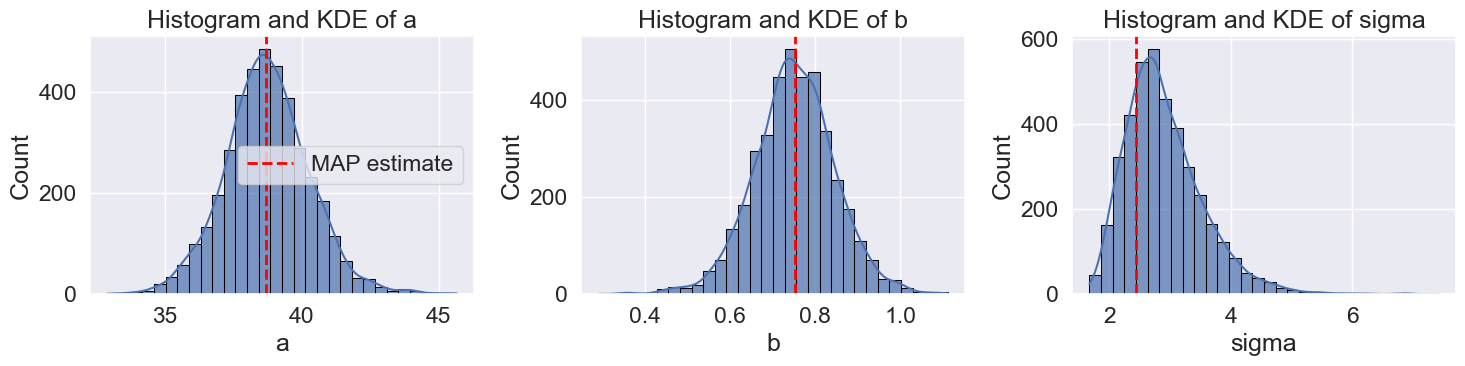

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(draws['a'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(x=map_est_dict['a'], color='red', linestyle='--', linewidth=2, label='MAP estimate')
plt.legend()
plt.xlabel('a')
plt.title('Histogram and KDE of a')

plt.subplot(1, 3, 2)
sns.histplot(draws['b'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(x=map_est_dict['b'], color='red', linestyle='--', linewidth=2, label='MAP estimate')
plt.xlabel('b')
plt.title('Histogram and KDE of b')

plt.subplot(1, 3, 3)
sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(x=map_est_dict['sigma'], color='red', linestyle='--', linewidth=2, label='MAP estimate')
plt.xlabel('sigma')
plt.title('Histogram and KDE of sigma')

plt.tight_layout()
plt.show()

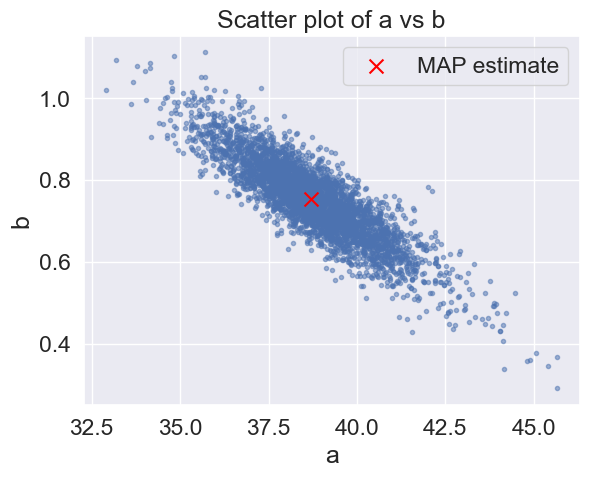

In [ ]:
plt.scatter(draws['a'], draws['b'], alpha=0.5, marker='.')
plt.scatter(map_est_dict['a'], map_est_dict['b'], color='red', marker='x', s=100, label='MAP estimate')
plt.legend()
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a vs b')
plt.show()

## 🧠 Joint vs Marginal Modes: What's the Difference?

In general, **yes**, the mode of the marginal posterior $p(a)$ can be **different** from the value of $a$ at the mode of the joint posterior $p(a, b, c)$. Here's why:

### 🔍 Definitions

- **Joint mode**: The point $(a^*, b^*, c^*)$ that maximizes the joint posterior $p(a, b, c)$.
- **Marginal mode**: The value $a^\dagger$ that maximizes the marginal posterior  
  $$
  p(a) = \int \int p(a, b, c) \, db \, dc
  $$

### 📉 Why They Differ

- **Integration vs Optimization**: Marginalization involves integrating out $b$ and $c$, which can shift the peak of $p(a)$ away from $a^*$.
- **Skewness and Correlation**: If $a$ is correlated with $b$ or $c$, or if the joint distribution is skewed, the marginal distribution may peak at a different value.
- **Dimensionality Effects**: In higher dimensions, the volume around the joint mode may not contribute the most to the marginal density.

### 🧪 Example

Imagine a bivariate distribution $p(a, b)$ shaped like a tilted ellipse.  
- The **joint mode** might be at the tip of the ellipse.  
- The **marginal mode** of $a$ could be somewhere along the longer axis—where the density is spread out more.

### 🧭 Practical Implication

If you're interested in inference for $a$ alone, it's better to use the **marginal posterior** $p(a)$ rather than relying on the joint mode. This is especially true in Bayesian modeling where uncertainty and dependencies matter.

---

Want to see a visual or code example to make this even more intuitive?

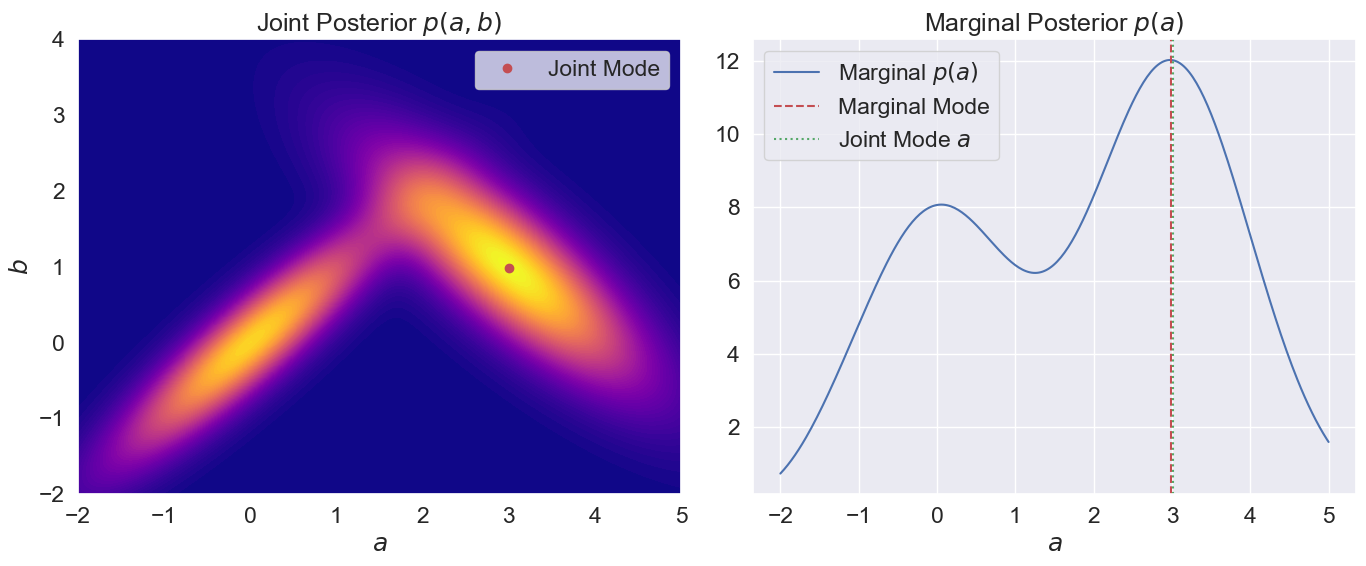

Joint mode of a: 3.0100334448160533
Marginal mode of a: 2.9866220735785953


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define two bivariate Gaussians
mean1 = [0, 0]
cov1 = [[1, 0.9], [0.9, 1]]

mean2 = [3, 1]
cov2 = [[1, -0.8], [-0.8, 1]]

# Mixture weights
w1, w2 = 0.4, 0.6

# Grid
a = np.linspace(-2, 5, 300)
b = np.linspace(-2, 4, 300)
A, B = np.meshgrid(a, b)
pos = np.dstack((A, B))

# Joint density: mixture of Gaussians
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
joint_density = w1 * rv1.pdf(pos) + w2 * rv2.pdf(pos)

# Joint mode (approximate)
joint_mode_idx = np.unravel_index(np.argmax(joint_density), joint_density.shape)
joint_mode_a = A[joint_mode_idx]
joint_mode_b = B[joint_mode_idx]

# Marginal of a
marginal_a = np.sum(joint_density, axis=0)
marginal_mode_a = a[np.argmax(marginal_a)]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Joint posterior
ax[0].contourf(A, B, joint_density, levels=100, cmap='plasma')
ax[0].plot(joint_mode_a, joint_mode_b, 'ro', label='Joint Mode')
ax[0].set_title('Joint Posterior $p(a, b)$')
ax[0].set_xlabel('$a$')
ax[0].set_ylabel('$b$')
ax[0].legend()

# Marginal posterior of a
ax[1].plot(a, marginal_a, label='Marginal $p(a)$')
ax[1].axvline(marginal_mode_a, color='r', linestyle='--', label='Marginal Mode')
ax[1].axvline(joint_mode_a, color='g', linestyle=':', label='Joint Mode $a$')
ax[1].set_title('Marginal Posterior $p(a)$')
ax[1].set_xlabel('$a$')
ax[1].legend()

plt.tight_layout()
plt.show()

print(f"Joint mode of a: {joint_mode_a}")
print(f"Marginal mode of a: {marginal_mode_a}")

